# Visualization

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
accident = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
accident.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [3]:
accident.isna().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      91
VERAEND_VORMONAT_PROZENT          246
VERAEND_VORJAHRESMONAT_PROZENT    176
ZWOELF_MONATE_MITTELWERT          238
dtype: int64

In [4]:
accident[accident['WERT'].isna()]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1795,Verkehrsunfälle,Verletzte und Getötete,2022,202208,NaN,531.0,NaN,NaN,NaN
1796,Verkehrsunfälle,Verletzte und Getötete,2022,202209,NaN,678.0,NaN,NaN,NaN
1797,Verkehrsunfälle,Verletzte und Getötete,2022,202210,NaN,561.0,NaN,NaN,NaN
1798,Verkehrsunfälle,Verletzte und Getötete,2022,202211,NaN,430.0,NaN,NaN,NaN


### From the data, we see that WERT values for 2022 haven't been updated and hence are the only null values, hence we drop null values for WERT

In [5]:
accident.dropna(subset=['WERT'], inplace=True)

In [6]:
history = accident.pivot_table(values=['WERT'], index=['JAHR'], columns=['MONATSZAHL'], aggfunc='sum')
history

WERT                              
MONATSZAHL Alkoholunfälle Fluchtunfälle Verkehrsunfälle
JAHR                                                   
2000               2620.0       24250.0        114448.0
2001               2478.0       24166.0        118226.0
2002               2364.0       22558.0        106508.0
2003               2098.0       20346.0        100104.0
2004               1926.0       22178.0        102994.0
2005               1762.0       23124.0        105198.0
2006               1770.0       18268.0         97776.0
2007               1682.0       19206.0         96122.0
2008               1444.0       19668.0         94302.0
2009               1286.0       19452.0         92782.0
2010               1206.0       20710.0         93892.0
2011               1190.0       21512.0        105714.0
2012               1326.0       23370.0        113240.0
2013               1060.0       23414.0        117792.0
2014               1098.0       22806.0        117990.0
2015               1272.0       23734.0        117178.0
2016                890.0       23454.0        117070.0
2017               1170.0       23628.0        113148.0
2018               1160.0       24406.0        116812.0
2019               1322.0       24628.0        115124.0
2020               1360.0       20978.0         98112.0
2021               1194.0       20870.0         96800.0

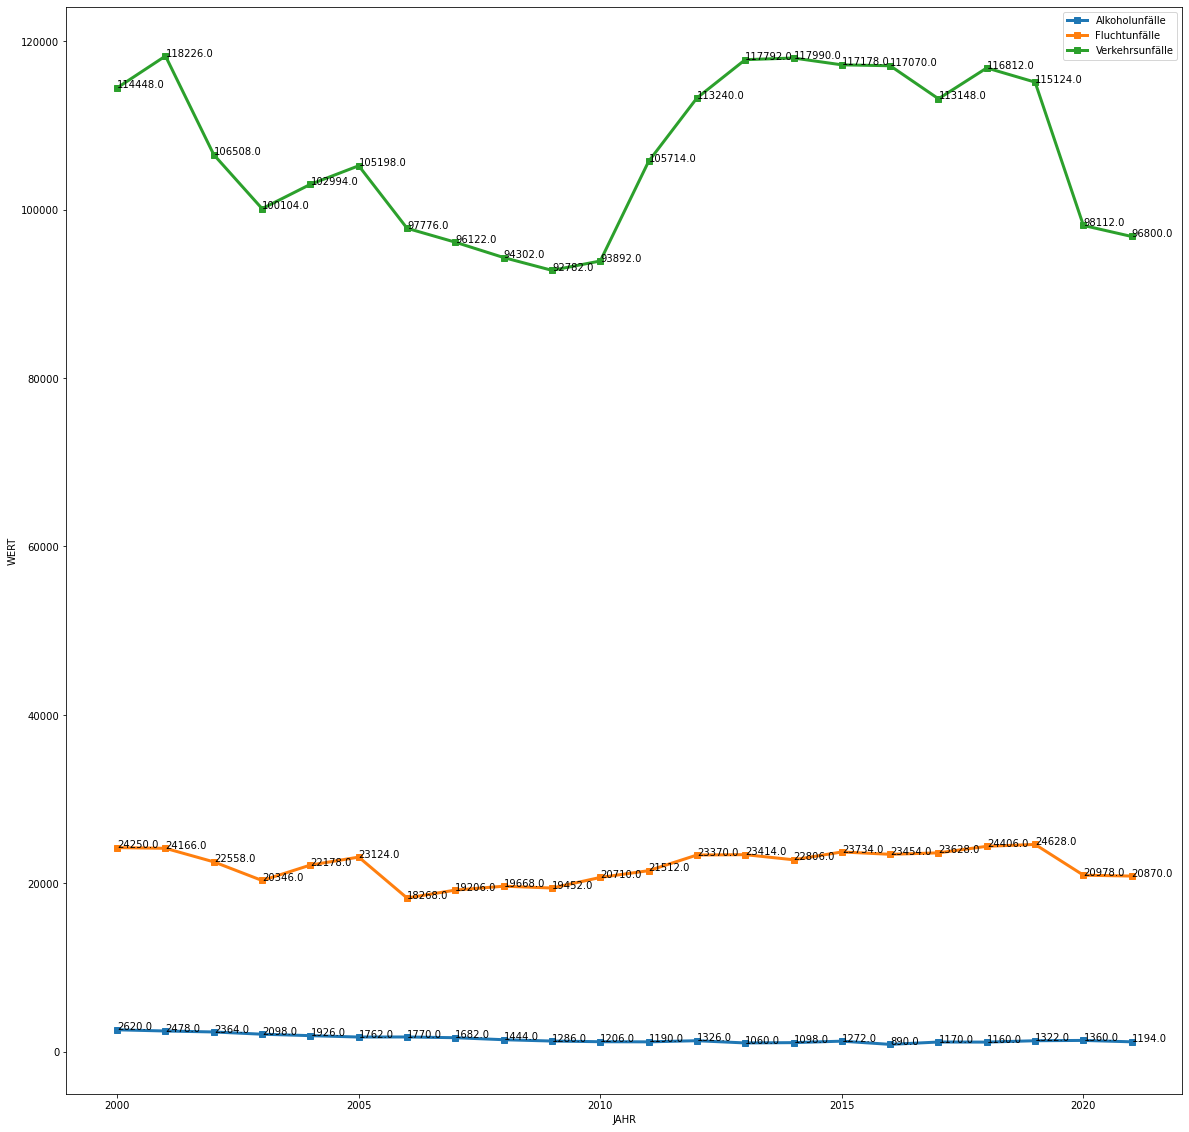

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel('JAHR')
ax.set_ylabel('WERT')
history.plot(style='s-',figsize=(20,20),linewidth=3, ax=ax)
for a, b in history.iterrows():
    for val in b.values:
        ax.annotate(val, (a,val))
ax.legend(['Alkoholunfälle','Fluchtunfälle','Verkehrsunfälle'])

# Modelling

### Drop Columns not needed

In [8]:
accident.drop(columns=['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT'], inplace=True)

### Check for null values

In [9]:
accident.isna().sum()

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
MONAT          0
WERT           0
dtype: int64

In [10]:
accident.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0
13,Alkoholunfälle,insgesamt,2021,202101,16.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0


#### Strip years from MONAT Column

In [11]:
accident['MONAT'].apply(lambda x: x[-2:])

12      me
13      01
14      02
15      03
16      04
        ..
2081    08
2082    09
2083    10
2084    11
2085    12
Name: MONAT, Length: 2002, dtype: object

In [12]:
accident['MONAT'] =  accident['MONAT'].apply(lambda x: x[-2:])

In [13]:
accident.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2021,me,383.0
13,Alkoholunfälle,insgesamt,2021,01,16.0
14,Alkoholunfälle,insgesamt,2021,02,14.0
15,Alkoholunfälle,insgesamt,2021,03,24.0
16,Alkoholunfälle,insgesamt,2021,04,16.0


#### Split dataset

In [14]:
train, test = train_test_split(accident, test_size=0.33, random_state=42)

#### Fit a DictVectorizer to encode categorical columns

In [26]:
def vectorize(df, categorical, train=False):
    '''
    Input
    df: Dataframe to be Vectorized
    categorical: Categorical variables to be transformed
    train: Is the data training or testing data?
    '''
    df[categorical] = df[categorical].astype(str)
    feature_dict = df[categorical].to_dict(orient='records')
    vc = DictVectorizer()
    if train:
        feature_matrix = vc.fit_transform(feature_dict)
    else:
        feature_matrix = vc.transform(feature_dict)
    return feature_matrix

In [ ]:
vc = DictVectorizer

In [16]:
categorical = ['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT']
train_matrix = vectorize(train, categorical)
train_matrix.shape

(1341, 41)

In [17]:
test_matrix = vectorize(test, categorical)
test_matrix.shape

(661, 41)

In [18]:
target = 'WERT'
y_train = train[target].values
y_test = test[target].values

In [19]:
lr = LinearRegression()
lr.fit(train_matrix, y_train)
y_test_pred = lr.predict(test_matrix)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
test_RMSE

4176.688731417242

In [20]:
r2 = r2_score(y_test, y_test_pred)
r2

0.4040561064814485

In [24]:
pr = PoissonRegressor()
pr.fit(train_matrix, y_train)
y_test_pred = pr.predict(test_matrix)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
test_RMSE

311.5017164652965

In [25]:
y_train_pred = pr.predict(train_matrix)
train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)
train_RMSE

196.86940096619918

The Linear Regression model performs worse because the target variable isn't a Continuous value. This case is more appropriate for the Poisson Regressor.

Hence, the Poisson Regression model would be saved and deployed to the endpoint. Also, the DictVectorizer is saved for prediction

Save Model and Vectorizer using Pickle

In [ ]:
with open('model.bin', 'wb') as f_out:
    pickle.dump((vc, ))